In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/Fraudulent_processed.csv")

In [3]:
df["hour"] = df["time_step"] % 24

In [4]:
df["day"] = (df["time_step"] // 24) % 7


In [5]:
day_map = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
}

df["day_name"] = df["day"].map(day_map)


In [6]:
pivot_table = df.pivot_table(
    index="day_name",
    columns="hour",
    values="amount",      # can be any column
    aggfunc="count"       # count = transaction volume
)


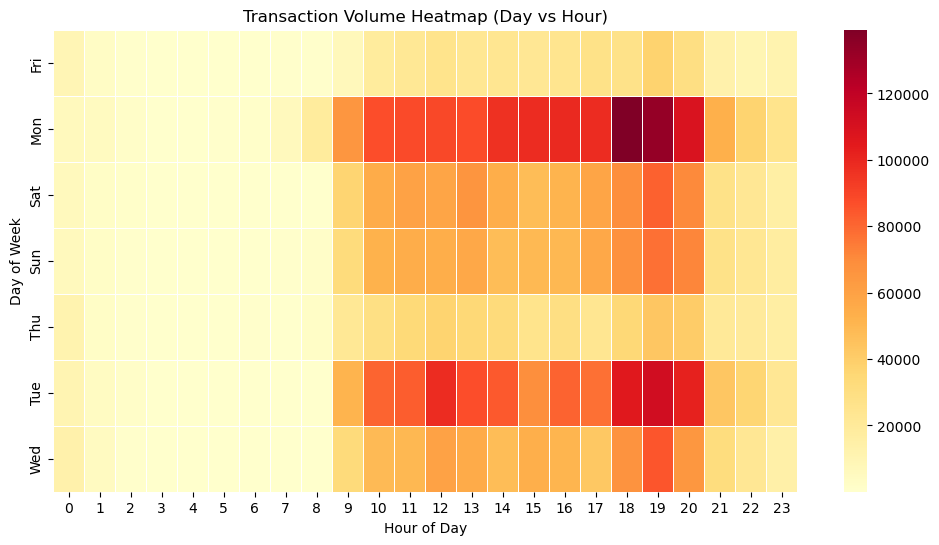

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table,
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Transaction Volume Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()
